In [1]:
# !usr/bin/python
# -*- encoding: utf-8 -*-
# Project: OOP Class
# Author: Tracy Tao
# Date: 2022/04/10
import torch
from torch import nn
from torch.nn import functional as F

- https://pytorch-cn.readthedocs.io/zh/latest/package_references/functional/
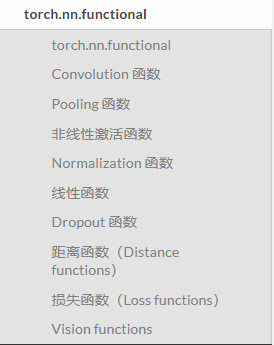

In [2]:
class MLP(nn.Module):
    def __init__(self):
        '''调用MLP的父类Module的构造函数初始化'''
        super().__init__()
        self.hidden = nn.Linear(20, 256)  # 隐藏层
        self.out = nn.Linear(256, 10)  # 输出层
    def forward(self, X):
        '''前向传播'''
        return self.out(F.relu(self.hidden(X)))

In [4]:
net = MLP()
X = torch.rand(2, 20)
net(X)

tensor([[-0.2190,  0.2769, -0.1490,  0.0618, -0.0041, -0.2315, -0.0467,  0.0280,
          0.0366, -0.0446],
        [ 0.0117,  0.0546, -0.1186,  0.0133,  0.0046, -0.1432, -0.0349,  0.0288,
          0.0730, -0.0326]], grad_fn=<AddmmBackward0>)

In [5]:
class MySequential(nn.Module):
    '''定义顺序块'''
    def __init__(self, *args):
        '''调用MLP的父类Module的构造函数初始化'''
        super().__init__()
        for idx, module in enumerate(args):
            self._modules[str(idx)] = module
    def forward(self, X):
        '''前向传播'''
        for block in self._modules.values(): # 初始化中是字典
            X = block(X) # 用当前层的输出值来更新X作为下一层输入
        return X 

In [6]:
net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
net(X)

tensor([[ 0.1405, -0.1520, -0.5721,  0.1640,  0.3416, -0.1439, -0.0368,  0.0782,
         -0.1777,  0.1768],
        [ 0.2180, -0.2000, -0.5606,  0.1681,  0.3511, -0.1550, -0.0768,  0.1655,
         -0.2087,  0.2319]], grad_fn=<AddmmBackward0>)

In [8]:
class FixedHiddenMLP(nn.Module):
    '''常数参数MLP'''
    def __init__(self):
        '''调用MLP的父类Module的构造函数初始化'''
        super().__init__()
        self.rand_weight = torch.rand((20,20), requires_grad = False) # 随机生成常值权重参数
        self.linear = nn.Linear(20,20)
        
    def forward(self,X):
        '''前向传播'''
        X = self.linear(X) # 全连接层一
        X = F.relu(torch.mm(X, self.rand_weight) + 1 )
        # torch.nn.functional.relu(input, inplace=False)
        # torch.mm()是矩阵正常的矩阵相乘
        X = self.linear(X) # 全连接层e二
        while X.abs().sum() >1: # L1范数
            X /= 2
        return X.sum()

In [9]:
net = FixedHiddenMLP()
net(X)

tensor(0.3033, grad_fn=<SumBackward0>)

In [11]:
class NestMLP(nn.Module):
    '''方法嵌套块'''
    def __init__(self):
        '''继承父类模块初始化'''
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64),
                                 nn.ReLU(),
                                 nn.Linear(64, 32),
                                 nn.ReLU()) # 定义模型，顺序类
        self.linear = nn.Linear(32, 16)
    
    def forward(self, X):
        '''前向传播算法'''
        return self.linear(self.net(X))

In [12]:
net = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHiddenMLP())
net(X)

tensor(-0.1814, grad_fn=<SumBackward0>)

In [13]:
# 访问模型参数
net[2].state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0694,  0.1801,  0.0143, -0.0142,  0.0921,  0.0637, -0.1149, -0.1637,
                        0.0215,  0.0892, -0.1626, -0.0396, -0.2151, -0.1543,  0.0844,  0.2212,
                        0.0413, -0.2141, -0.0031, -0.0534],
                      [-0.0857,  0.0774, -0.1841,  0.0768,  0.1237,  0.1554,  0.1600,  0.0454,
                       -0.1696,  0.0457, -0.1738, -0.2005, -0.1132, -0.0144, -0.0142, -0.0417,
                       -0.1029,  0.0064, -0.2054,  0.1975],
                      [ 0.1823,  0.1541, -0.0014, -0.1169, -0.0122, -0.0222,  0.0012,  0.1228,
                        0.1541,  0.1437, -0.0548, -0.0285, -0.1976,  0.0855, -0.1904,  0.0280,
                       -0.1639,  0.0759, -0.0132,  0.0460],
                      [ 0.1206,  0.0992,  0.1849, -0.0103,  0.0444,  0.1876,  0.0181,  0.1659,
                       -0.1116, -0.1882, -0.0468, -0.1412, -0.0109, -0.1403, -0.1318, -0.2202,
                        0.208

In [23]:
print(type(net[1].bias))
print(net[1].bias)
print(net[1].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.0019, -0.0683, -0.0598,  0.2238,  0.0868,  0.0774, -0.0933,  0.0309,
         0.1101, -0.0234, -0.0297, -0.1349, -0.2323,  0.2010,  0.1929,  0.2332,
        -0.1880,  0.0526,  0.1733,  0.1483], requires_grad=True)
tensor([-0.0019, -0.0683, -0.0598,  0.2238,  0.0868,  0.0774, -0.0933,  0.0309,
         0.1101, -0.0234, -0.0297, -0.1349, -0.2323,  0.2010,  0.1929,  0.2332,
        -0.1880,  0.0526,  0.1733,  0.1483])


In [25]:
net[1].weight.grad == None # 访问参数梯度

True

In [26]:
print(*[(name, param.shape) for name, param in net[0].named_parameters()])
print(*[(name, param.shape) for name, param in net.named_parameters()])

('net.0.weight', torch.Size([64, 20])) ('net.0.bias', torch.Size([64])) ('net.2.weight', torch.Size([32, 64])) ('net.2.bias', torch.Size([32])) ('linear.weight', torch.Size([16, 32])) ('linear.bias', torch.Size([16]))
('0.net.0.weight', torch.Size([64, 20])) ('0.net.0.bias', torch.Size([64])) ('0.net.2.weight', torch.Size([32, 64])) ('0.net.2.bias', torch.Size([32])) ('0.linear.weight', torch.Size([16, 32])) ('0.linear.bias', torch.Size([16])) ('1.weight', torch.Size([20, 16])) ('1.bias', torch.Size([20])) ('2.linear.weight', torch.Size([20, 20])) ('2.linear.bias', torch.Size([20]))


In [28]:
net.state_dict()['1.bias'].data

tensor([-0.0019, -0.0683, -0.0598,  0.2238,  0.0868,  0.0774, -0.0933,  0.0309,
         0.1101, -0.0234, -0.0297, -0.1349, -0.2323,  0.2010,  0.1929,  0.2332,
        -0.1880,  0.0526,  0.1733,  0.1483])

In [29]:
def block1():
    return nn.Sequential(nn.Linear(4, 8), 
                         nn.ReLU(),
                         nn.Linear(8, 4), 
                         nn.ReLU())

def block2():
    '''嵌套块收集参数'''
    net = nn.Sequential()
    for i in range(4):
        # 在这里嵌套
        net.add_module(f'block {i}', block1())
    return net

In [31]:
net = nn.Sequential(block2(), nn.Linear(4, 1))
X = torch.rand(size=(2, 4))
net(X)

tensor([[0.4303],
        [0.4303]], grad_fn=<AddmmBackward0>)

In [32]:
print(net)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


In [33]:
net[0][1][0].bias.data

tensor([ 0.2396,  0.3176, -0.3528, -0.2460, -0.0385,  0.2815, -0.0325,  0.2968])

In [34]:
def init_normal(module):
    if type(module) == nn.Linear:
        nn.init.normal_(module.weight, mean=0, std=0.01)
        nn.init.zeros_(module.bias)

In [36]:
net.apply(init_normal)
net[1].weight.data[0], net[1].bias.data[0]

(tensor([-0.0033,  0.0093, -0.0061, -0.0074]), tensor(0.))

- https://zhuanlan.zhihu.com/p/53712833
##### 权值初始化的十种方法
    1. torch.nn.init.xavier_uniform_(tensor, gain=1) 服从均匀分布U(−a,a) 
    2. torch.nn.init.xavier_normal_(tensor, gain=1) 正态分布
    3. torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu') kaiming均匀分布
    4. torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu') N～ (0,std)
    5. torch.nn.init.uniform_(tensor, a=0, b=1) 均匀分布U(a,b)
    6. torch.nn.init.normal_(tensor, mean=0, std=1) 正态分布N(mean, std)
    7. torch.nn.init.constant_(tensor, val) 常数初始化
    8. torch.nn.init.eye_(tensor) 单位矩阵初始化
    9. torch.nn.init.orthogonal_(tensor, gain=1) 正交初始化
    10. torch.nn.init.sparse_(tensor, sparsity, std=0.01)  从正态分布N～（0. std）中进行稀疏化

In [37]:
def xavier_uniform(module):
    if type(module) == nn.Linear:
        nn.init.xavier_uniform_(module.weight)
def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

In [49]:
net[0].apply(xavier_uniform)

Sequential(
  (block 0): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
  )
  (block 1): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
  )
  (block 2): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
  )
  (block 3): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
  )
)

In [40]:
net[1].apply(init_42)

Linear(in_features=4, out_features=1, bias=True)

In [50]:
# 延后初始化
net = nn.Sequential(nn.LazyLinear(256), nn.ReLU(),nn.Linear(256,10))
print(net)

Sequential(
  (0): LazyLinear(in_features=0, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)


D:\anaconda3\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [51]:
[net[i].state_dict() for i in range(len(net))]

[OrderedDict([('weight', <UninitializedParameter>),
              ('bias', <UninitializedParameter>)]),
 OrderedDict(),
 OrderedDict([('weight',
               tensor([[ 0.0599, -0.0076, -0.0106,  ...,  0.0062,  0.0050,  0.0064],
                       [ 0.0037,  0.0279, -0.0054,  ...,  0.0119,  0.0355, -0.0013],
                       [-0.0624, -0.0065, -0.0033,  ...,  0.0437,  0.0104, -0.0023],
                       ...,
                       [ 0.0345,  0.0485, -0.0254,  ...,  0.0368,  0.0195,  0.0034],
                       [-0.0327,  0.0541,  0.0138,  ...,  0.0369,  0.0135, -0.0530],
                       [-0.0349, -0.0266, -0.0357,  ..., -0.0467,  0.0213, -0.0592]])),
              ('bias',
               tensor([-0.0102, -0.0491, -0.0163,  0.0616,  0.0570,  0.0159, -0.0219, -0.0220,
                       -0.0185, -0.0318]))])]

In [52]:
low = torch.finfo(torch.float32).min/10
high = torch.finfo(torch.float32).max/10
low, high

(-3.4028234663852886e+37, 3.4028234663852886e+37)

In [53]:
X = torch.zeros([2,20],dtype=torch.float32).uniform_(low, high)
net(X)
print(net)

Sequential(
  (0): Linear(in_features=20, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)


In [54]:
class CenteredLayer(nn.Module):
    '''构造一个没有任何参数的自定义层'''
    def __init__(self):
        '''继承父类模块初始化'''
        super().__init__()

    def forward(self, X):
        '''前向传播功能'''
        return X - X.mean()

In [55]:
layer = CenteredLayer()
layer(torch.FloatTensor([1, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [56]:
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())
print(net)

Sequential(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): CenteredLayer()
)


In [57]:
Y = net(torch.rand(4, 8))
Y.mean()

tensor(3.7253e-09, grad_fn=<MeanBackward0>)

In [58]:
x = torch.arange(4)
torch.save(x, 'x-file')

In [59]:
x2 = torch.load('x-file')
x2

tensor([0, 1, 2, 3])

In [60]:
y = torch.zeros(4)
torch.save([x, y],'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([0, 1, 2, 3]), tensor([0., 0., 0., 0.]))

In [61]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([0, 1, 2, 3]), 'y': tensor([0., 0., 0., 0.])}

In [62]:
!nvidia-smi

Sun Apr 10 18:03:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:05:00.0 Off |                  N/A |
| N/A   52C    P8    N/A /  N/A |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [65]:
torch.device('cpu'), torch.device('cuda'), torch.device('cuda:1'), torch.device('cuda:2')

(device(type='cpu'),
 device(type='cuda'),
 device(type='cuda', index=1),
 device(type='cuda', index=2))

In [66]:
torch.cuda.device_count()

1

In [67]:
def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

In [68]:
x = torch.tensor([1, 2, 3])
x.device

device(type='cpu')

In [69]:
X = torch.ones(2, 3, device=try_gpu())
X

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [71]:
X.device # 在GPU上创建的张量只消耗这个GPU的显存

device(type='cuda', index=0)

In [72]:
!nvidia-smi

Sun Apr 10 18:06:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:05:00.0 Off |                  N/A |
| N/A   52C    P8    N/A /  N/A |    561MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [75]:
X = torch.ones(2, 3, device=try_gpu())
X

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [77]:
Z = X.cuda(0)
print(X)
print(Z)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [79]:
X + Z

tensor([[2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

In [81]:
Z.cuda(0) is Z

True

In [82]:
net = nn.Sequential(nn.Linear(3, 1))
net = net.to(device=try_gpu())

In [83]:
net = nn.Sequential(nn.Linear(3, 1))
net = net.to(device=try_gpu())

In [84]:
net(X)

tensor([[-0.1207],
        [-0.1207]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [85]:
net[0].weight.data.device

device(type='cuda', index=0)